In [1]:
import pandas as pd
import numpy as np
import seaborn
from nltk.corpus import stopwords
from itertools import chain
from nltk.probability import FreqDist

In [2]:
data_read=pd.read_csv("network_USA.csv",delimiter=",",header=0)

In [4]:
data_read.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Network Engineer,"Quality Technology Solutions, Inc.",NaN,"ATSG, a full-service tech-enabled managed serv...","ATSG, a full-service tech-enabled managed serv..."
1,New+York,Network Design Engineer,Google,NaN,"Experience with network architecture, manageme...",Note: By applying to this position your applic...
2,New+York,"Network Engineer, Backend Backbone",Google,NaN,"As a Network Engineer, you will be responsible...",Note: By applying to this position your applic...
3,New+York,Network Engineer,New York City TAXI & LIMOUSINE COMMISSION,NaN,Prior network design and implementation experi...,"$68,427 - $95,000 a yearThe New York City Taxi..."
4,New+York,Network Support Engineer,Spotify,NaN,You will train Support Engineers in network tr...,We are currently seeking a passionate and anal...


## Preprocessing:

In [5]:
# enlever ponctuation
data_read["resume"]= data_read["resume"].str.replace('[^\w\s]','')
data_read["description"]=data_read["description"].str.replace('[^\w\s]','')
# transformer les lettres en minuscule:
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
# enlever stopword 
stop = stopwords.words('english')
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))

In [16]:
b=[True if "network" in k.lower() else False for  k in data_read.utituler_offre]

## Analyse descriptif:
Tout d'abord, on va faire une fonction qui va retourner un dataframe contenant la liste des mots comme rowname et comme colonne les occurences.

In [18]:
from collections import Counter
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
def word_count_text(List_text,N_min=7500,tokenizer_true=False):
    der="".join(List_text)
    tokens = nltk.word_tokenize(" ".join(List_text))
    fdist=FreqDist(tokens)
    ## Compter le nombre d'occurence des mots
    dict_word=dict(fdist)
    # On enregistre les mots dans un dataframe
    pd_dict_word=pd.DataFrame(list(dict_word.values()),index=dict_word.keys(),columns=["occurence"])
    pd_dict_word=pd_dict_word.sort_values(by="occurence",ascending=False)
    ## On filtre les mots dont l'occurence sont supérieurs à N_min
    pd_dict_word=pd_dict_word.loc[pd_dict_word.occurence>N_min,:]
    # on retourne un dataframe
    return pd_dict_word

## Bag of word:¶

Dans cette partie, on va contruire notre sac de mot d'une part, et d'autre part, on va aussi compter le nombre de fois où revient un mot.Ici on ne va conciderer que les mots ayant comme occurence plus de 7500 fois.


In [19]:
description=data_read.description.tolist()
pd_dict_word= word_count_text(description)

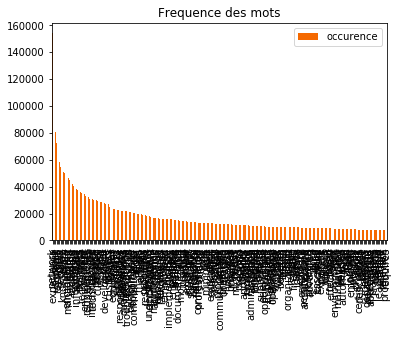

In [21]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

## Wordcloud:

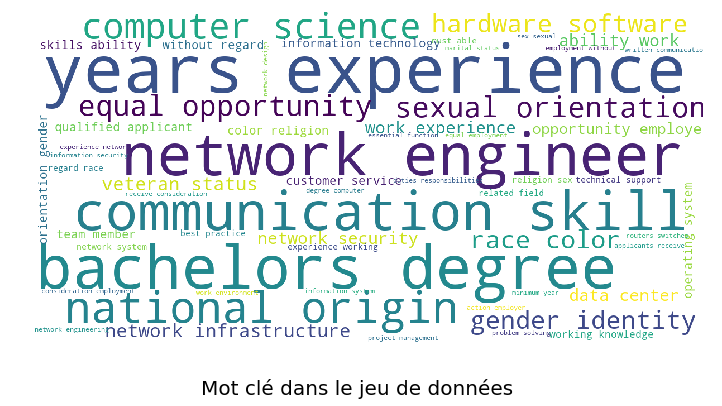

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
stopwords = set(STOPWORDS) 
def show_wordcloud(data,stopwords=stopwords,title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## word clue:
Dans cette partie, on va étudier les mots clés que l'on considère être des mots  clés connus dans le domaine de la data science. On va tout d'abord étudier les mots liés au outils utilisés dans le domaine de la data science. Pour le logiciel r on va mettre des espaces avant et après la lettre r pour ne pas considérer les lettres r dans d'autres mots.

In [25]:
Mot_cle_technique = ['python','r','sql','java','scala','excel',"ruby",
        'aws','hadoop','spark','linux','tableau',"nosql","Oracle","etl","crm",
               'linux','sas','hive','oracle','perl',"informatica",'Cognos',"hbase",
               'mysql','html','sap','spss','mongodb',"c++","postgresql","pig"]

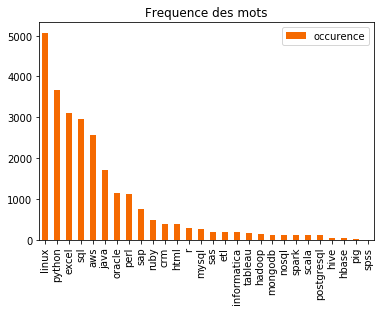

In [26]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

## Enlever les postes qui ne sont pas dans le domaine de l'ingenierie réseaux:

In [27]:
bolean=[ True if "network" in k.lower() and "engineer" in k.lower() else False for k in data_read.utituler_offre]

In [29]:
data_filtered=data_read[bolean]
data_filtered.shape

(12336, 6)

In [30]:
data_filtered.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Network Engineer,"Quality Technology Solutions, Inc.",NaN,atsg fullservice techenabled managed services ...,atsg fullservice techenabled managed services ...
1,New+York,Network Design Engineer,Google,NaN,experience network architecture management tro...,note applying position application automatical...
2,New+York,"Network Engineer, Backend Backbone",Google,NaN,network engineer responsible network infrastru...,note applying position application automatical...
3,New+York,Network Engineer,New York City TAXI & LIMOUSINE COMMISSION,NaN,prior network design implementation experience...,68427 95000 yearthe new york city taxi limousi...
4,New+York,Network Support Engineer,Spotify,NaN,train support engineers network troubleshootin...,currently seeking passionate analytical networ...


## Revisualisation des données:

In [38]:
description=data_filtered.description.tolist()
pd_dict_word= word_count_text(description,N_min=12000)

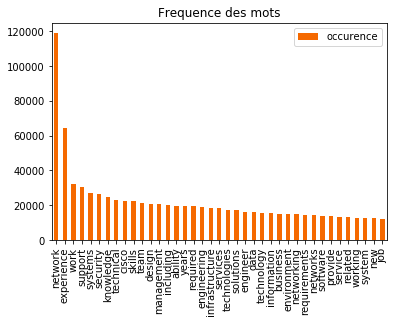

In [39]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

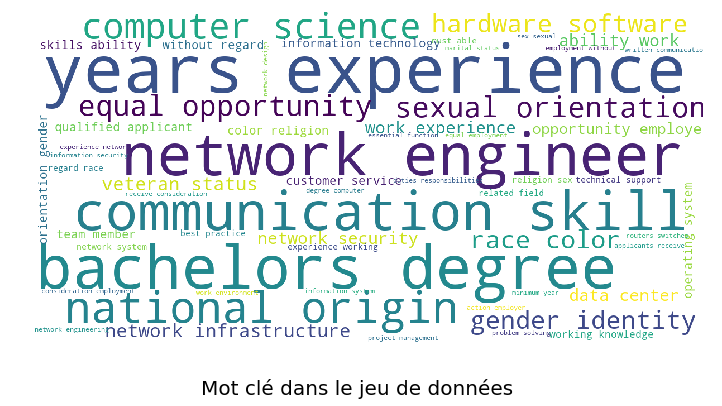

In [40]:
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## Outils informatiques :

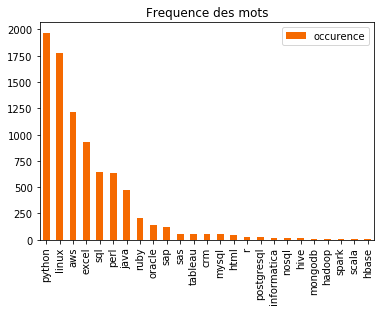

In [41]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

In [42]:
data_filtered.to_csv("network_engineer_filtered.csv",index=False)